In [6]:
PPFD_Dict = dict()
PPFD_Dict[164]={372:[318.055556,602.777778,951.449275,1342.753623,
                     1621.428572,1637.301587,1640.909091,1595.454545,
                     1550,1534.848485,1519.69697,1383.333334,1216.666667,
                     847,390.333333],
                552:[325,616.666667,931.15942,1260.869565,1529.761905,
                     1656.746032,1756.818182,1749.242424,1741.666667,
                     1688.636364,1635.606061,1431.349206,1189.285715,
                     811,374.333333]}
PPFD_Dict[176]={372:[158.442982,331.688597,731.907895,1076.704545,
                     1199.810606,1322.916667,1542.214912,1727.52193,
                     1606.907895,1455.492425,1180.871212,906.25,
                     516.995614,157.986111],
                552:[158.442982,328.947368,701.754386,1055.871212,
                     1335.227273,1614.583333,1713.267544,1795.504386,
                     1729.714912,1603.219697,1233.901515,864.583333,
                     519.188596,197.337963]}
PPFD_Dict[191]={372:[295.019894,583.116711,935.42152,1330.531657,
                     1611.134555,1624.553894,1631.636984,1581.693823,
                     1531.750663,1516.956836,1502.163009,1370.754763,
                     1210.192911,846.002768,346.060431],
                552:[307.950928,608.97878,923.277592,1246.423711,
                     1509.096938,1630.666747,1739.026147,1728.491853,
                     1717.95756,1670.248372,1622.539185,1424.359778,
                     1188.562817,807.771883,330.318302]}
PPFD_Dict[205]={372:[112.980769,205.128205,372.596154,653.044872,933.49359,
                     1075.79023,1183.54885,1291.307471,1187.026515,
                     1059.185606,789.402174,458.786232,193.75],
                552:[129.00641,237.179487,425.480769,733.974359,1042.467949,
                     1127.155173,1155.890805,1184.626437,1242.897727,
                     1304.450758,999.547102,537.59058,193.75]}
PPFD_Dict[215]={372:[159.172662,280.57554,361.510791,442.446043,760.507384,
                     1050.359712,1086.330935,1122.302158,1066.18705,795.203837,
                     524.220623,302.506382,195.753075],
                552:[159.172662,275.779376,344.724221,413.669065,803.672851,
                     1155.190134,1160.32888,1165.467626,1087.769784,816.786571,
                     545.803357,322.000464,208.284985]}
PPFD_Dict[233]={372:[232.613909,454.436451,602.517986,701.438849,762.433531,
                     671.723491,581.01345,678.586543,729.701953,511.305242,
                     292.90853,133.093525],
                552:[289.568345,568.345324,715.827338,775.779377,799.343134,
                     677.353769,555.364404,680.279306,756.423433,527.749229,
                     299.075026,133.093525]}
PPFD_Dict[254]={372:[337.985726,666.693101,994.752267,1322.649381,1528.183981,
                     1611.356066,1694.528152,1538.11412,1381.700087,1287.141725,
                     1199.456214,758.849398,230.012256],
                552:[291.125369,572.972388,941.861187,1332.51043,1561.173672,
                     1627.850912,1694.528152,1616.661002,1538.793852,1381.397983,
                     1215.165591,758.849398,230.012256]}


In [7]:
def addAllantoinMetabolism(backup):
    model = backup.copy()
    ############
    # Nino-Gonzalez et al 2019
    # Chen et al 2006
    # Ritzel et al 2001
    # Takagi et al 2018
    met1 = Metabolite("S_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="c",
                      charge=0)
    amet1 = Metabolite("aS_ALLANTOIN_c",name="S-ALLANTOIN:(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="c",
                      charge=-1)

    rxn1 = Reaction("Allantoin_tx",name="Allantoin uptake")
    rxn1.add_metabolites({model.metabolites.PROTON_e:-1,
                          model.metabolites.PROTON_c:1,met1:0.78,amet1:0.22})
    rxn1.gene_reaction_rule='Glyma.15G066400'
    rxn1.lower_bound = 0
    rxn1.upper_bound = 1000
    ##########
    met2 = Metabolite("S_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H6N4O3",compartment="r",
                      charge=0)
    amet2 = Metabolite("aS_ALLANTOIN_r",name="(S)-(+)-allantoin",
                      formula="C4H5N4O3",compartment="r",
                      charge=-1)


    proton_R = model.metabolites.PROTON_c.copy()
    proton_R.id = "PROTON_r"
    proton_R.compartment = "r"
    rxnProton = Reaction("PROTON_rc",name="ER proton exchange")
    rxnProton.add_metabolites({proton_R:-1,model.metabolites.PROTON_c:1})
    rxnProton.lower_bound = -1000
    rxnProton.upper_bound = 1000

    rxn2 = Reaction("Allantoin_rc",name="Allantoin peroxisome uptake/efflux")
    rxn2.add_metabolites({met1:-0.78,amet1:-0.22,proton_R:-0.12,met2:0.9,amet2:0.1})
    rxn2.lower_bound = -1000
    rxn2.upper_bound = 1000
    ###########
    met3 = Metabolite("ALLANTOATE_r",name="allantoate",
                      formula="C4H7N4O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWater = Reaction("H2O_rc",name="ER water exchange")
    rxnWater.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWater.lower_bound = -1000
    rxnWater.upper_bound = 1000


    rxn3 = Reaction("ALLANTOINASE_RXN_r",name="ALLANTOINASE-RXN")
    rxn3.add_metabolites({met2:-0.9,amet2:-0.1,water_R:-1,
                          met3:1,proton_R:0.9})
    rxn3.gene_reaction_rule='Glyma.15G073000 or Glyma.15G072900 or Glyma.13G240500 or Glyma.13G240600'
    #Glyma.15G073000 - cytoplasmic in Uniprot
    #Glyma.15G072900 - cytoplasmic in Uniprot
    #Glyma.13G240500 - cytoplasmic in Uniprot
    #Glyma.13G240600 - cytoplasmic in Uniprot
    #But according to Takagi et al 2018 ER

    rxn3.lower_bound = 0
    rxn3.upper_bound = 1000
    ############
    met4 = Metabolite("CPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H7N3O3",compartment="r",
                      charge=0)
    amet4 = Metabolite("aCPD0_2298_r",name="CPD0-2298:(S)-ureidoglycine",
                      formula="C3H6N3O3",compartment="r",
                      charge=-1)

    met5 = model.metabolites.AMMONIUM_c.copy()
    met5.id = "AMMONIUM_r"
    met5.compartment = "r"
    rxnNH4 = Reaction("NH4_rc",name="Ammonium ER exchange")
    rxnNH4.add_metabolites({met5:-1,model.metabolites.AMMONIUM_c:1})
    rxnNH4.lower_bound = -1000
    rxnNH4.upper_bound = 1000

    co2_R = model.metabolites.CARBON_DIOXIDE_c.copy()
    co2_R.id = "CARBON_DIOXIDE_r"
    co2_R.compartment = "r"
    rxnCO2 = Reaction("CO2_rc",name="CO2 ER exchange")
    rxnCO2.add_metabolites({co2_R:-1,model.metabolites.CARBON_DIOXIDE_c:1})
    rxnCO2.lower_bound = -1000
    rxnCO2.upper_bound = 1000

    rxn4 = Reaction("ALLANTOATE_DEIMINASE_RXN_r",name="ALLANTOATE-DEIMINASE-RXN:allantoate deiminase")
    rxn4.gene_reaction_rule='Glyma.15G156900 or Glyma.09G050800'
    rxn4.add_metabolites({met3:-1,proton_R:-1.72,water_R:-1,
                          met4:0.72,amet4:0.28,met5:1,co2_R:1})
    #Glyma.15G156900 -ER in Uniprot
    #Glyma.09G050800 -ER in Uniprot
    rxn4.lower_bound = 0
    rxn4.upper_bound = 1000
    #############
    met6 = Metabolite("CPD_1091_r",name="CPD-1091:(S)-ureidoglycolate",
                      formula="C3H5N2O4",compartment="r",
                      charge=-1)

    water_R = model.metabolites.WATER_c.copy()
    water_R.id = "WATER_r"
    water_R.compartment = "r"
    rxnWATER = Reaction("H2O_rc",name="H2O ER exchange")
    rxnWATER.add_metabolites({water_R:-1,model.metabolites.WATER_c:1})
    rxnWATER.lower_bound = -1000
    rxnWATER.upper_bound = 1000

    rxn5 = Reaction("URUR_RXN_r",name="URUR-RXN:(S)-ureidoglycine aminohydrolase")
    rxn5.gene_reaction_rule='Glyma.17G148400 or Glyma.05G066500'
    #Glyma.17G148400
    #Glyma.05G066500
    rxn5.add_metabolites({met4:-0.72,amet4:-0.28,proton_R:-0.28,water_R:-1,
                          met6:1,met5:1})
    rxn5.lower_bound = 0
    rxn5.upper_bound = 1000
    #############
    # met7 = model.metabolites.UREA_c.copy()
    # met7.id = "UREA_r"
    # met7.compartment="r"

    # rxn6 = Reaction("ALLANTOICASE_RXN_r",name="ALLANTOICASE-RXN:allantoicase")
    # rxn6.add_metabolites({met3:-1,model.metabolites.WATER_r:-1,
    #                       met6:1,met7:1})
    # rxn6.lower_bound = 0
    # rxn6.lower_bound = 1000
    #############

    glyox_R = model.metabolites.GLYOX_x.copy()
    glyox_R.id = "GLYOX_r"
    glyox_R.compartment = "r"
    rxnGlyox = Reaction("glyox_rx",name="glyoxylate ER-peroxisome exchange")
    rxnGlyox.add_metabolites({glyox_R:-1,model.metabolites.GLYOX_x:1})

    rxn7 = Reaction("UREIDOGLYCOLATE_HYDROLASE_RXN_r",name="UREIDOGLYCOLATE-HYDROLASE-RXN:ureidoglycolate amidohydrolase")
    rxn7.gene_reaction_rule='Glyma.20G205500 or Glyma.10G184900'
    #Glyma.20G205500 - ER in Uniprot
    #Glyma.10G184900 - ER in Uniprot
    rxn7.add_metabolites({met6:-1,proton_R:-2,water_R:-1,
                          met5:2,co2_R:1,glyox_R:1})
    rxn7.lower_bound = 0
    rxn7.upper_bound = 1000
    #############
    # rxn8 = Reaction("UREIDOGLYCOLATE_LYASE_RXN_r",name="UREIDOGLYCOLATE-LYASE-RXN:ureidoglycolate lyase")
    # rxn8.add_metabolites({met6:-1,
    #                       met7:1,model.metabolites.GLYOX_r:1})
    # rxn8.lower_bound = 0
    # rxn8.lower_bound = 1000
    ############
    model.add_reactions([rxn1,rxn2,rxn3,rxn4,rxn5,rxn7,
                         rxnCO2,rxnGlyox,rxnNH4,rxnProton,rxnWater])
    return model

def custom_pFBA(model):
    sol = model.optimize()
    for rxn in model.reactions:
        if rxn.objective_coefficient != 0:
            rxn.lower_buond = round(sol.fluxes[rxn.id],3)
            rxn.upper_bound = round(sol.fluxes[rxn.id],3)
    from sweetlovegroup import FBA
    Irrev_model = FBA.rev2irrev(model)
    for rxn in Irrev_model.reactions:
        if rxn.upper_bound > 0:
            rxn.objective_coefficient = -1
        else:
            rxn.objective_coefficient = 1
    sol2 = Irrev_model.optimize()
    rxnSet=set()
    fluxDict = dict()
    for rxn in Irrev_model.reactions.query("_reverse"):
        rxnSet.add(rxn.id)
        rxnSet.add(rxn.id.replace("_reverse",""))
        fluxDict[rxn.id.replace("_reverse","")]=sol2.fluxes[rxn.id]+sol2.fluxes[rxn.id.replace("_reverse","")]
    for rxn in Irrev_model.reactions:
        if rxn.id in rxnSet:
            continue
        else:
            fluxDict[rxn.id]=sol2.fluxes[rxn.id]
    sol3 = sol2
    sol3.fluxes = fluxDict
    return sol3

########################################################
#This function was used to set up a C3 leaf diel model #
########################################################
def setupC3DielModel(core_model,transferMets="",starch_sucrose_ratio=None):
    '''
    This function can be used to generate a fully constrained diel C3 leaf model
    from a core model.
    Inputs: 1) a cobra model 2) a list of metabolites allowed to accumulate 3)
    starch to sucrose accumulation rate ratio
    Outputs: a fully constrained diel C3 leaf model
    '''
    from cobra.core import Metabolite, Reaction
    import re

    #create two copies of model elements for day and night
    tempCompDict = dict()
    for comp in core_model.compartments:
        tempCompDict[comp+"1"] = core_model.compartments[comp]+" day"
        tempCompDict[comp+"2"] = core_model.compartments[comp]+" night"

    cobra_model2 = core_model.copy()
    for met in cobra_model2.metabolites:
        met.id = met.id+"1"
        met.compartment = met.compartment+"1"
    for rxn in cobra_model2.reactions:
        rxn.id = rxn.id+"1"

    cobra_model3 = core_model.copy()
    for met in cobra_model3.metabolites:
        met.id = met.id+"2"
        met.compartment = met.compartment+"2"
    for rxn in cobra_model3.reactions:
        rxn.id = rxn.id+"2"

    #merge the day and night model
    cobra_model = cobra_model2+cobra_model3
    for met in cobra_model3.metabolites:
        if not cobra_model.metabolites.__contains__(met.id):
            cobra_model.add_metabolites(met.copy())
    for comp in cobra_model.compartments:
        cobra_model.compartments[comp] = tempCompDict[comp]

    met1 = Metabolite("X_Phloem_contribution_t1",name="Phloem output during the day",compartment="b1")
    cobra_model.reactions.get_by_id("Phloem_output_tx1").add_metabolites({met1:1})
    met2 = Metabolite("X_Phloem_contribution_t2",name="Phloem output during at night",compartment="b1")
    cobra_model.reactions.get_by_id("Phloem_output_tx2").add_metabolites({met2:1})

    rxn = Reaction("diel_biomass")
    rxn.add_metabolites({met1:-3,met2:-1})
    rxn.lower_bound = 0
    rxn.upper_bound = 1000
    cobra_model.add_reaction(rxn)

    #Adding reactions to allow for day-night metabolite accumulations
    if transferMets!="":
        tmfile = open(transferMets,"r")
        tmset=set()
        for line in tmfile:
            tmset.add(line.replace("\n",""))
    else:
        tmset=set(["STARCH_p","SUCROSE_v","MAL_v","aMAL_v","NITRATE_v","CIT_v",
        "aCIT_v","GLN_v","ASN_v","SER_v","GLN_v","GLY_v","THR_v","L_ALPHA_ALANINE_v",
        "4_AMINO_BUTYRATE_v","VAL_v","ILE_v","PHE_v","LEU_v","LYS_v","ARG_v",
        "L_ASPARTATE_v","GLT_v","HIS_v","bHIS_v","MET_v","PRO_v","TRP_v","TYR_v",
        "CYS_v","FRUCTAN_v","AMMONIUM_v"])

    for met in tmset:
        if met == "AMMONIUM_v" or met=="FRUCTAN_v":
            continue
        tempRxn = Reaction(met+"_dielTransfer")
        tempRxn.add_metabolites({cobra_model.metabolites.get_by_id(met+"1"):-1,cobra_model.metabolites.get_by_id(met+"2"):1})
        tempRxn.lower_bound=-1000
        if not ((met == "STARCH_p") or (met == "SUCROSE_v") or (met == "MAL_v") or (met == "aMAL_v") or (met == "NITRATE_v") or (met == "CIT_v") or (met == "aCIT_v") or (met == "PROTON_v")):
            tempRxn.lower_bound=0
        tempRxn.upper_bound=1000
        cobra_model.add_reaction(tempRxn)

    fractionMets=dict()
    for rxn in cobra_model.reactions:
        for met in rxn.metabolites.keys():
            prefix=""
            a=re.search("^a{1,3}",met.id)
            anion=""
            if a:
                anion=a.group(0)
                prefix=anion
            b=re.search("^b{1,3}",met.id)
            basic=""
            if b:
                basic=b.group(0)
                prefix=basic
            if ((not prefix == "") and met.compartment == "v1"):
                fractionMets[met]=prefix

    temp=cobra_model.copy()
    for met in fractionMets.keys():
        for rxn in met.reactions:
            if rxn.id.__contains__("_dielTransfer"):
                continue
            else:
                mainMet = met.id[len(fractionMets[met]):]
                coeff1 = temp.reactions.get_by_id(rxn.id).metabolites.get(temp.metabolites.get_by_id(mainMet))
                coeff2 = temp.reactions.get_by_id(rxn.id).metabolites.get(temp.metabolites.get_by_id(met.id))
                if not coeff1:
                    coeff1=0
                if not coeff2:
                    coeff2=0
                total = coeff1 + coeff2
                coeff1 = float(coeff1)/total
                coeff2 = float(coeff2)/total
                if cobra_model.reactions.has_id(met.id[0:len(met.id)-1]+"_dielTransfer"):
                    ub = temp.reactions.get_by_id(met.id[0:len(met.id)-1]+"_dielTransfer").upper_bound
                    lb = temp.reactions.get_by_id(met.id[0:len(met.id)-1]+"_dielTransfer").lower_bound
                    temp.reactions.get_by_id(met.id[0:len(met.id)-1]+"_dielTransfer").remove_from_model()
                    temp.reactions.get_by_id(mainMet[0:len(mainMet)-1]+"_dielTransfer").remove_from_model()
                    Reac = Reaction(mainMet[0:len(mainMet)-1]+"_dielTransfer",name=mainMet+"_dielTransfer")
                    Reac.add_metabolites({temp.metabolites.get_by_id(met.id[0:len(met.id)-1]+"1"):-coeff2,temp.metabolites.get_by_id(met.id[0:len(met.id)-1]+"2"):coeff2,temp.metabolites.get_by_id(mainMet[0:len(mainMet)-1]+"1"):-coeff1,temp.metabolites.get_by_id(mainMet[0:len(mainMet)-1]+"2"):coeff1})
                    Reac.lower_bound=lb
                    Reac.upper_bound=ub
                    temp.add_reaction(Reac)
                    print(Reac.reaction)
                break
    ####ADD CONSTRAINTS TO MODEL####
    cobra_model = temp.copy()

    #objective function
    cobra_model.reactions.get_by_id("diel_biomass").objective_coefficient=1
    #Leaves - light
    cobra_model.reactions.get_by_id("Sucrose_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("Sucrose_tx1").upper_bound=0
    cobra_model.reactions.get_by_id("GLC_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("GLC_tx1").upper_bound=0
    cobra_model.reactions.get_by_id("CO2_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("NH4_tx1").lower_bound=0
    cobra_model.reactions.get_by_id("NH4_tx1").upper_bound=0
    #Leaves - dark
    cobra_model.reactions.get_by_id("Sucrose_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("Sucrose_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("GLC_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("GLC_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("Photon_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("Photon_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("NH4_tx2").lower_bound=0
    cobra_model.reactions.get_by_id("NH4_tx2").upper_bound=0
    cobra_model.reactions.get_by_id("CO2_tx2").upper_bound=0

    #Set pG6P transporter to 0
    cobra_model.reactions.get_by_id("G6P_Pi_pc1").lower_bound=0
    cobra_model.reactions.get_by_id("G6P_Pi_pc1").upper_bound=0
    cobra_model.reactions.get_by_id("G6P_Pi_pc2").lower_bound=0
    cobra_model.reactions.get_by_id("G6P_Pi_pc2").upper_bound=0

    #Turn off PTOX
    cobra_model.reactions.get_by_id("Plastoquinol_Oxidase_p1").lower_bound=0
    cobra_model.reactions.get_by_id("Plastoquinol_Oxidase_p1").upper_bound=0

    #nitrate uptake constrain
    Nitrate_balance = Metabolite("Nitrate_bal_c", name = "Weights to balance nitrate uptake", compartment = "c1")
    cobra_model.reactions.get_by_id("Nitrate_ec1").add_metabolites({Nitrate_balance:-2})
    cobra_model.reactions.get_by_id("Nitrate_ec2").add_metabolites({Nitrate_balance:3})

    #Rubisco balance
    Rubisco_balance = Metabolite("rubisco_bal_p1", name = "Weights to balance RuBP carboxygenase oxygenase balance", compartment = "p1")
    cobra_model.reactions.get_by_id("RXN_961_p1").add_metabolites({Rubisco_balance:3})
    cobra_model.reactions.get_by_id("RIBULOSE_BISPHOSPHATE_CARBOXYLASE_RXN_p1").add_metabolites({Rubisco_balance:-1})

    #generic ATPase and NADPH oxidase
    Maintenance_constraint = Metabolite("ATPase_NADPHoxidase_constraint_c1",name =  "ATPase_NADPHoxidase_constraint_c1", compartment = "c1")
    Maintenance_constraint2 = Metabolite("ATPase_NADPHoxidase_constraint_c2",name =  "ATPase_NADPHoxidase_constraint_c2", compartment = "c2")
    Maintenance_constraint3 = Metabolite("Light_dark_maintainence_constraint",name =  "Light_dark_maintainence_constraint", compartment = "c1")
    cobra_model.reactions.get_by_id("ATPase_tx1").add_metabolites({Maintenance_constraint:1,Maintenance_constraint3:1})
    cobra_model.reactions.get_by_id("ATPase_tx2").add_metabolites({Maintenance_constraint2:1,Maintenance_constraint3:-1})
    cobra_model.reactions.get_by_id("NADPHoxc_tx1").add_metabolites({Maintenance_constraint:-3})
    cobra_model.reactions.get_by_id("NADPHoxc_tx2").add_metabolites({Maintenance_constraint2:-3})
    cobra_model.reactions.get_by_id("NADPHoxm_tx1").add_metabolites({Maintenance_constraint:-3})
    cobra_model.reactions.get_by_id("NADPHoxm_tx2").add_metabolites({Maintenance_constraint2:-3})
    cobra_model.reactions.get_by_id("NADPHoxp_tx1").add_metabolites({Maintenance_constraint:-3})
    cobra_model.reactions.get_by_id("NADPHoxp_tx2").add_metabolites({Maintenance_constraint2:-3})

    ##constrain sucrose and starch storage
    if starch_sucrose_ratio is not None:
        Sucorse_starch_balance = Metabolite("sucrose_starch_bal_c", name = "Weights to balance sucrose-starch uptake", compartment = "c1")
        cobra_model.reactions.get_by_id("SUCROSE_v_dielTransfer").add_metabolites({Sucorse_starch_balance:-1*starch_sucrose_ratio})
        cobra_model.reactions.get_by_id("STARCH_p_dielTransfer").add_metabolites({Sucorse_starch_balance:1})

    #Plastid enolase was not detected in Arabidopsis mesophyll tissue
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p1").lower_bound=0
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p1").upper_bound=0
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p2").lower_bound=0
    cobra_model.reactions.get_by_id("2PGADEHYDRAT_RXN_p2").upper_bound=0

    #Setting chloroplastic NADPH dehydrogenase to 0  ((Yamamoto et al., 2011)
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p1").lower_bound=0
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p1").upper_bound=0
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p2").lower_bound=0
    cobra_model.reactions.get_by_id("NADPH_Dehydrogenase_p2").upper_bound=0

    #ATP_ADP_Pi constrained to 0 because while there is evidence for its existance, it does not carry high flux
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc1").lower_bound = 0
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc1").upper_bound = 0
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc2").lower_bound = 0
    cobra_model.reactions.get_by_id("ATP_ADP_Pi_pc2").upper_bound = 0

    return cobra_model


In [8]:
from cobra import io,flux_analysis
from cobra.core import Reaction, Metabolite

#import model. Update file name and location in the next line
cobra_model = io.sbml.read_sbml_model("./../Data/PlantCoreMetabolism_v2_0_0.xml")
cobra_model.solver="glpk"

for rxn in cobra_model.reactions:
    if rxn.lower_bound == -1000:
        rxn.lower_bound = -3000
    if rxn.upper_bound == 1000:
        rxn.upper_bound = 3000


from cobra import flux_analysis
leaf_model = cobra_model.copy()

leaf_model.reactions.GLC_tx.upper_bound = 0
leaf_model.reactions.GLC_tx.lower_bound = 0
leaf_model.reactions.Sucrose_tx.upper_bound = 0
leaf_model.reactions.Sucrose_tx.lower_bound = 0
leaf_model.reactions.Photon_tx.upper_bound = 0
leaf_model.reactions.Photon_tx.lower_bound = 0
leaf_model.reactions.Nitrate_tx.lower_bound = 0
leaf_model.reactions.Nitrate_tx.upper_bound = 0
leaf_model.reactions.NH4_tx.lower_bound = 0
leaf_model.reactions.NH4_tx.upper_bound = 0
leaf_model = addAllantoinMetabolism(leaf_model)
for rxn in leaf_model.reactions:
    if rxn.id=="diel_biomass":
        rxn.objective_coefficient=1
    else:
        rxn.objective_coefficient=0
leaf_model.reactions.get_by_id("Biomass_tx").lower_bound = 0
leaf_model.reactions.get_by_id("Biomass_tx").upper_bound = 0
leaf_model.reactions.get_by_id("AraCore_Biomass_tx").lower_bound = 0
leaf_model.reactions.get_by_id("AraCore_Biomass_tx").upper_bound = 0


leaf_model = setupC3DielModel(leaf_model)
temp = leaf_model.copy()

solutionDict = dict()
for day in PPFD_Dict.keys():
    tempDict = dict()
    for CO2 in [372,552]:
        tempDict2 = dict()
        i = 0
        for PPFD in PPFD_Dict[day][CO2]:
            leaf_model = temp.copy()
            i=i+1
            leaf_model.reactions.Photon_tx1.upper_bound = PPFD
            leaf_model.reactions.Photon_tx1.lower_bound = 0
            ATPase = (0.0049*PPFD) + 2.7851
            temp.reactions.get_by_id("ATPase_tx1").lower_bound = ATPase
            temp.reactions.get_by_id("ATPase_tx1").upper_bound = ATPase
            temp.reactions.get_by_id("NADPHoxc_tx1").lower_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxc_tx1").upper_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxp_tx1").lower_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxp_tx1").upper_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxm_tx1").lower_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxm_tx1").upper_bound = ATPase/9
            temp.reactions.get_by_id("ATPase_tx2").lower_bound = ATPase
            temp.reactions.get_by_id("ATPase_tx2").upper_bound = ATPase
            temp.reactions.get_by_id("NADPHoxc_tx2").lower_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxc_tx2").upper_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxp_tx2").lower_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxp_tx2").upper_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxm_tx2").lower_bound = ATPase/9
            temp.reactions.get_by_id("NADPHoxm_tx2").upper_bound = ATPase/9
            from cobra.flux_analysis import pfba
            sol = pfba(leaf_model)
            tempDict2[i] = sol.fluxes
            print("Phloem export rate ="+str(sol.fluxes["diel_biomass"]*4))
        tempDict[CO2]=tempDict2
    solutionDict[day]=tempDict
        



C:\ProgramData\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '0+unknown' currently installed).
  warnings.warn(msg, UserWarning)


Academic license - for non-commercial use only - expires 2021-08-06
Using license file C:\Users\sanus\gurobi.lic
0.5 CIT_v1 + 0.5 aCIT_v1 <=> 0.5 CIT_v2 + 0.5 aCIT_v2
bHIS_v1 --> bHIS_v2
0.7 MAL_v1 + 0.3 aMAL_v1 <=> 0.7 MAL_v2 + 0.3 aMAL_v2
Phloem export rate =2.2899617510943995
Phloem export rate =4.138926282061609
Phloem export rate =6.585345301352303
Phloem export rate =9.324189228189912
Phloem export rate =11.241957406551345
Phloem export rate =11.292394319183325
Phloem export rate =11.314741500541333
Phloem export rate =10.986474873589138
Phloem export rate =10.66945938079559
Phloem export rate =10.570736775057826
Phloem export rate =10.465064944050205
Phloem export rate =9.48622155669842
Phloem export rate =8.31688217616669
Phloem export rate =5.692147954587774
Phloem export rate =2.4872477078945123
Phloem export rate =2.121333066543425
Phloem export rate =4.23738465982989
Phloem export rate =6.43599891424333
Phloem export rate =8.738999588859084
Phloem export rate =10.6003994289

In [9]:
for day in PPFD_Dict.keys():
    for CO2 in [372,552]:
        fout = open("./../../ODE_FBA_Photosynthesis2021/Validations/Combined_FBAonly_FACE"+str(day)+"_"+str(CO2)+"_17Jun21.csv","w")
        fout.write("Reaction ID,Reaction equation")
        for i in range(0,len(PPFD_Dict[day][CO2])):
            fout.write(",Hour "+str(i+1))
        fout.write("\n")
        for rxn in leaf_model.reactions:
            fout.write(rxn.id+","+rxn.reaction)
            for i in range(0,len(PPFD_Dict[day][CO2])):
                fout.write(","+str(solutionDict[day][CO2][i+1][rxn.id]))
            fout.write("\n")
        fout.close()

In [10]:
Day_list = [164, 176, 191, 205, 215, 233]
Day_dict = {164:list(range(1,16)),
            176:list(range(1,15)),
            191:list(range(1,16)),
            205:list(range(1,14)),
            215:list(range(1,14)),
            233:list(range(1,13)),
            254:list(range(1,14))}
CO2_list = [372,552]

In [11]:
import statistics as st
FBA_A_dict=dict()
FBA_PSII_dict=dict()
FBA_starch_content = dict()
for Day in Day_list:
    tempDict1 = dict()
    tempDict2 = dict()
    tempDict3 = dict()
    for CO2 in CO2_list:
        Hour = 6#round(st.median(Day_dict[Day]))
        A = solutionDict[Day][CO2][Hour]["CO2_tx1"]
        JpsII = solutionDict[Day][CO2][Hour]["PSII_RXN_p1"]*4
        tempDict1[CO2]=A
        tempDict2[CO2]=JpsII
        
        starch_level = 0
        for Hour in Day_dict[Day]:
            if Hour > 6:#round(st.median(Day_dict[Day])):
                break
            starch_acc = solutionDict[Day][CO2][Hour]["STARCH_p_dielTransfer"]
            starch_level = starch_level+((starch_acc*60*60)/1000)
        tempDict3[CO2]=starch_level
    FBA_A_dict[Day]=tempDict1
    FBA_PSII_dict[Day]=tempDict2
    FBA_starch_content[Day]=tempDict3

In [12]:
import statistics as st
ODE_A_dict=dict()
ODE_PSII_dict=dict()
ODE_starch_content = dict()
for Day in Day_list:
    tempDict1 = dict()
    tempDict2 = dict()
    tempDict3 = dict()
    for CO2 in CO2_list:
        Hour = 6#round(st.median(Day_dict[Day]))
        fin = "./../../ODE_FBA_Photosynthesis2021/Validations/ODE_only_OutputFluxT_FACE"+str(Day)+"_"+str(CO2)+"_"+str(Hour)+".csv"
        fin = open(fin)
        tempFluxDict = dict()
        for line in fin:
            tempFluxDict[line.split()[0]] = float(line.split()[1])
        tempDict1[CO2]=(tempFluxDict["vc"]-(0.5*tempFluxDict["vo"]))
        tempDict2[CO2]=tempFluxDict["vz_2"]
        
        starch_level = 0
        print("Day="+str(Day)+" - [CO2]="+str(CO2))
        print("Hour\tStarch accumulation rate(umol/m2/s)")
        for Hour in Day_dict[Day]:
            if Hour > 6:#round(st.median(Day_dict[Day])):
                break
            fin = "./../../ODE_FBA_Photosynthesis2021/Validations/ODE_only_OutputFluxT_FACE"+str(Day)+"_"+str(CO2)+"_"+str(Hour)+".csv"
            fin = open(fin)
            tempFluxDict = dict()
            for line in fin:
                tempFluxDict[line.split()[0]] = float(line.split()[1])
            print(str(Hour)+"\t"+str(tempFluxDict["v24"]-tempFluxDict["v25"]))
            starch_level = starch_level+(((tempFluxDict["v24"]-tempFluxDict["v25"])*60*60)/1000)
        tempDict3[CO2]=starch_level
        print("Starch level at noon (mmol/m2)\t"+str(starch_level))
    ODE_A_dict[Day]=tempDict1
    ODE_PSII_dict[Day]=tempDict2
    ODE_starch_content[Day]=tempDict3

Day=164 - [CO2]=372
Hour	Starch accumulation rate(umol/m2/s)
1	0.15704287
2	0.7746717399999999
3	1.18353978
4	1.1901362000000002
5	1.19332451
6	1.19349499
Starch level at noon (mmol/m2)	20.491956324
Day=164 - [CO2]=552
Hour	Starch accumulation rate(umol/m2/s)
1	0.17375047999999998
2	0.8724434400000001
3	1.90594507
4	1.9479399
5	1.95063152
6	1.95165729
Starch level at noon (mmol/m2)	31.688523719999996
Day=176 - [CO2]=372
Hour	Starch accumulation rate(umol/m2/s)
1	0.04479431
2	0.17031588
3	1.12102573
4	1.18645001
5	1.18822568
6	1.18991299
Starch level at noon (mmol/m2)	17.64260856
Day=176 - [CO2]=552
Hour	Starch accumulation rate(umol/m2/s)
1	0.05020978999999999
2	0.17855151
3	1.2774993399999999
4	1.94059139
5	1.9488222899999998
6	1.95132559
Starch level at noon (mmol/m2)	26.449199676
Day=191 - [CO2]=372
Hour	Starch accumulation rate(umol/m2/s)
1	0.13619067
2	0.6958773
3	1.1829060299999998
4	1.19002144
5	1.1932161200000002
6	1.1933558199999998
Starch level at noon (mmol/m2)	20.129642568


In [13]:
import statistics as st
LC_A_dict=dict()
LC_PSII_dict=dict()
LC_starch_content = dict()
for Day in Day_list:
    tempDict1 = dict()
    tempDict2 = dict()
    tempDict3 = dict()
    for CO2 in CO2_list:
        Hour = 6#round(st.median(Day_dict[Day]))
        fin = "./../../ODE_FBA_Photosynthesis2021/Validations/Diel_flux_FACE"+str(Day)+"_"+str(CO2)+"_"+str(Hour)+".csv"
        fin = open(fin)
        tempFluxDict = dict()
        for line in fin:
            tempFluxDict[line.split(",")[0]] = float(line.split(",")[2])
        tempDict1[CO2]=tempFluxDict["CO2_tx1"]
        tempDict2[CO2]=tempFluxDict["PSII_RXN_p1"]*4
        
        starch_level = 0
        for Hour in Day_dict[Day]:
            if Hour > 6:#round(st.median(Day_dict[Day])):
                break
            fin = "./../../ODE_FBA_Photosynthesis2021/Validations/Diel_flux_FACE"+str(Day)+"_"+str(CO2)+"_"+str(Hour)+".csv"
            fin = open(fin)
            tempFluxDict = dict()
            for line in fin:
                tempFluxDict[line.split(",")[0]] = float(line.split(",")[2])
            starch_level = starch_level+((tempFluxDict["STARCH_p_dielTransfer"]*60*60)/1000)
        tempDict3[CO2]=starch_level
    LC_A_dict[Day]=tempDict1
    LC_PSII_dict[Day]=tempDict2
    LC_starch_content[Day]=tempDict3

In [14]:
import statistics as st
TC_A_dict=dict()
TC_PSII_dict=dict()
TC_starch_content = dict()
for Day in Day_list:
    tempDict1 = dict()
    tempDict2 = dict()
    tempDict3 = dict()
    for CO2 in CO2_list:
        Hour = 6#round(st.median(Day_dict[Day]))
        fin = "./../../ODE_FBA_Photosynthesis2021/Validations/OutputFluxT_FACE"+str(Day)+"_"+str(CO2)+"_"+str(Hour)+".csv"
        fin = open(fin)
        tempFluxDict = dict()
        for line in fin:
            tempFluxDict[line.split()[0]] = float(line.split()[1])
        tempDict1[CO2]=(tempFluxDict["vc"]-(0.5*tempFluxDict["vo"]))
        tempDict2[CO2]=tempFluxDict["vz_2"]
        
        starch_level = 0
        for Hour in Day_dict[Day]:
            if Hour > 6:#round(st.median(Day_dict[Day])):
                break
            fin = "./../../ODE_FBA_Photosynthesis2021/Validations/OutputFluxT_FACE"+str(Day)+"_"+str(CO2)+"_"+str(Hour)+".csv"
            fin = open(fin)
            tempFluxDict = dict()
            for line in fin:
                tempFluxDict[line.split()[0]] = float(line.split()[1])
            starch_level = starch_level+(((tempFluxDict["v24"]-tempFluxDict["v25"])*60*60)/1000)
        tempDict3[CO2]=starch_level
    TC_A_dict[Day]=tempDict1
    TC_PSII_dict[Day]=tempDict2
    TC_starch_content[Day]=tempDict3

In [15]:
ODE_A_dict

{164: {372: 21.732190499999998, 552: 29.333087499999998},
 176: {372: 21.6556635, 552: 29.325504},
 191: {372: 21.729225500000002, 552: 29.328497},
 205: {372: 21.5831325, 552: 29.217658},
 215: {372: 21.5769835, 552: 29.225935},
 233: {372: 21.1100925, 552: 27.357222500000002}}

In [16]:
LC_A_dict

{164: {372: 17.98496876516265, 552: 25.542480873459606},
 176: {372: 18.11242949035014, 552: 24.933630417488654},
 191: {372: 17.330660844888744, 552: 24.85462228246421},
 205: {372: 17.905327005862986, 552: 25.359280033892865},
 215: {372: 18.7429110867768, 552: 24.887982751417812},
 233: {372: 17.56147299847358, 552: 24.7056040281077}}

In [17]:
TC_A_dict

{164: {372: 21.712747999999998, 552: 29.293299499999996},
 176: {372: 21.635412499999997, 552: 29.284585},
 191: {372: 21.709139999999998, 552: 29.288525999999997},
 205: {372: 21.561595999999998, 552: 29.187824500000005},
 215: {372: 21.5531645, 552: 29.171605},
 233: {372: 20.954969, 552: 27.066926}}

In [18]:
# import pandas as pd
# A_df = pd.DataFrame(data={"ODE":[ODE_A_dict[d][372] for d in Day_list],
#                           "ODE2":[ODE_A_dict[d][552] for d in Day_list],
#                           "LC":[LC_A_dict[d][372] for d in Day_list],
#                           "LC2":[LC_A_dict[d][552] for d in Day_list],
#                           "TC":[TC_A_dict[d][372] for d in Day_list],
#                           "TC2":[TC_A_dict[d][552] for d in Day_list]})

# PSII_df = pd.DataFrame(data={"ODE":[ODE_PSII_dict[d][372] for d in Day_list],
#                              "ODE2":[ODE_PSII_dict[d][552] for d in Day_list],
#                              "LC":[LC_PSII_dict[d][372] for d in Day_list],
#                              "LC2":[LC_PSII_dict[d][552] for d in Day_list],
#                              "TC":[TC_PSII_dict[d][372] for d in Day_list],
#                              "TC2":[TC_PSII_dict[d][552] for d in Day_list]})

# starch_df = pd.DataFrame(data={"ODE":[ODE_starch_content[d][372] for d in Day_list],
#                                "ODE2":[ODE_starch_content[d][552] for d in Day_list],
#                                "LC":[LC_starch_content[d][372] for d in Day_list],
#                                "LC2":[LC_starch_content[d][552] for d in Day_list],
#                                "TC":[TC_starch_content[d][372] for d in Day_list],
#                                "TC2":[TC_starch_content[d][552] for d in Day_list]})

#### Using seaborn

In [19]:
Day_list

[164, 176, 191, 205, 215, 233]

In [20]:
import pandas as pd
A_df = pd.DataFrame(data={
                          "day":[164,164,176,176,191,191,205,205,215,215]+
                                [d for d in Day_list]+
                                [d for d in Day_list]+
                                [d for d in Day_list]+
                                [d for d in Day_list]+
                                [d for d in Day_list]+
                                [d for d in Day_list]+
                                [d for d in Day_list]+
                                [d for d in Day_list],
                          "CO2":[372,552,372,552,372,552,372,552,372,552]+
                                [372 for d in Day_list]+[552 for d in Day_list]+
                                [372 for d in Day_list]+[552 for d in Day_list]+
                                [372 for d in Day_list]+[552 for d in Day_list]+
                                [372 for d in Day_list]+[552 for d in Day_list],
                          "Flux":[18.4,23,17.6,25.9,26.7,32,21.9,28,22.6,30.4]+
                                 [FBA_A_dict[d][372] for d in Day_list]+
                                 [FBA_A_dict[d][552] for d in Day_list]+
                                 [ODE_A_dict[d][372] for d in Day_list]+
                                 [ODE_A_dict[d][552] for d in Day_list]+
                                 [LC_A_dict[d][372] for d in Day_list]+
                                 [LC_A_dict[d][552] for d in Day_list]+
                                 [TC_A_dict[d][372] for d in Day_list]+
                                 [TC_A_dict[d][552] for d in Day_list],
                          "data/model":["Data","Data","Data","Data","Data",
                                        "Data","Data","Data","Data","Data"]+
                                       ["FBA" for d in Day_list]+
                                       ["FBA" for d in Day_list]+
                                       ["ODE" for d in Day_list]+
                                       ["ODE" for d in Day_list]+
                                       ["LC" for d in Day_list]+
                                       ["LC" for d in Day_list]+
                                       ["TC" for d in Day_list]+
                                       ["TC" for d in Day_list]})

In [66]:
temp = A_df[A_df["data/model"]=="Data"]
temp = temp[temp["CO2"]==372]
temp

,day,CO2,Flux,data/model
0,164,372,18.4,Data
2,176,372,17.6,Data
4,191,372,26.7,Data
6,205,372,21.9,Data
8,215,372,22.6,Data


In [72]:
from scipy.stats import ttest_ind
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="FBA"]["Flux"])

In [73]:
ans_fba.pvalue

0.0006313578550049955

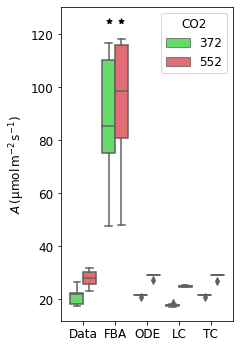

In [86]:
import seaborn as sns

import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3.5,5))
redblue = ["#51f057","#f75964"]
redblueMapping = {372:redblue[0],552:redblue[1]}
ax = sns.boxplot(x="data/model", y="Flux", hue="CO2", data=A_df, palette=redblueMapping)

from scipy.stats import ttest_ind
temp = A_df[A_df["CO2"]==372]
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="FBA"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(0.8,125,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="ODE"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(1.8,40,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="LC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(2.8,40,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="TC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(3.8,40,s=30,marker="*",color="black")


temp = A_df[A_df["CO2"]==552]
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="FBA"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(1.2,125,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="ODE"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(2.2,40,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="LC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(3.2,40,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="TC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(4.2,40,s=30,marker="*",color="black")

plt.ylabel(r'$A\/\mathrm{(\mu mol\/m^{-2}\/s^{-1})}$')
plt.xlabel('')
#plt.ylim(10,130)
plt.tight_layout()
plt.savefig("Fig4a_box.svg",format="svg")

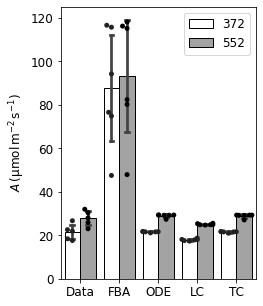

In [17]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3.5,5))
import seaborn as sns
sns.set_palette("gray",2)
g = sns.swarmplot(x="data/model", y="Flux", hue="CO2", color="black",data=A_df,dodge=True)

grayscale = ["#ffffff","#a3a3a3"]
newColMapping = {372:grayscale[0],552:grayscale[1]}
g = sns.barplot(x="data/model", y="Flux", hue="CO2", data=A_df,capsize=.1, ci="sd",edgecolor="black",palette=newColMapping)


h,l = g.get_legend_handles_labels()
plt.legend(h[2:],l[2:])
plt.ylabel(r'$A\/\mathrm{(\mu mol\/m^{-2}\/s^{-1})}$')
plt.xlabel('')
plt.show()

In [96]:
import pandas as pd
PSII_df = pd.DataFrame(data={
                          "day":[164,176,191,205,215]+
                                [164,176,191,205,215]+
                                [d for d in Day_list if d in [164,176,191,205,215]]+
                                [d for d in Day_list if d in [164,176,191,205,215]]+
                                [d for d in Day_list if d in [164,176,191,205,215]]+
                                [d for d in Day_list if d in [164,176,191,205,215]]+
                                [d for d in Day_list if d in [164,176,191,205,215]]+
                                [d for d in Day_list if d in [164,176,191,205,215]]+
                                [d for d in Day_list if d in [164,176,191,205,215]]+
                                [d for d in Day_list if d in [164,176,191,205,215]],
                          "CO2":[372 for d in Day_list if d in [164,176,191,205,215]]+
                                [552 for d in Day_list if d in [164,176,191,205,215]]+
                                [372 for d in Day_list if d in [164,176,191,205,215]]+
                                [552 for d in Day_list if d in [164,176,191,205,215]]+
                                [372 for d in Day_list if d in [164,176,191,205,215]]+
                                [552 for d in Day_list if d in [164,176,191,205,215]]+
                                [372 for d in Day_list if d in [164,176,191,205,215]]+
                                [552 for d in Day_list if d in [164,176,191,205,215]]+
                                [372 for d in Day_list if d in [164,176,191,205,215]]+
                                [552 for d in Day_list if d in [164,176,191,205,215]],
                          "Flux":[165.5,166.5,158.5,115.5,125]+
                                 [160.5,173.5,179.5,128.5,141.5]+
                                 [FBA_PSII_dict[d][372] for d in Day_list if d in [164,176,191,205,215]]+
                                 [FBA_PSII_dict[d][552] for d in Day_list if d in [164,176,191,205,215]]+
                                 [ODE_PSII_dict[d][372] for d in Day_list if d in [164,176,191,205,215]]+
                                 [ODE_PSII_dict[d][552] for d in Day_list if d in [164,176,191,205,215]]+
                                 [LC_PSII_dict[d][372] for d in Day_list if d in [164,176,191,205,215]]+
                                 [LC_PSII_dict[d][552] for d in Day_list if d in [164,176,191,205,215]]+
                                 [TC_PSII_dict[d][372] for d in Day_list if d in [164,176,191,205,215]]+
                                 [TC_PSII_dict[d][552] for d in Day_list if d in [164,176,191,205,215]],
                          "data/model":["Data" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["Data" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["FBA" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["FBA" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["ODE" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["ODE" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["LC" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["LC" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["TC" for d in Day_list if d in [164,176,191,205,215]]+
                                       ["TC" for d in Day_list if d in [164,176,191,205,215]]})

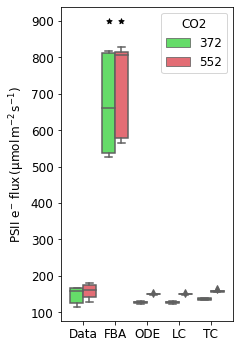

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3.5,5))
redblue = ["#51f057","#f75964"]
redblueMapping = {372:redblue[0],552:redblue[1]}
sns.boxplot(x="data/model", y="Flux", hue="CO2", data=PSII_df, palette=redblueMapping)


from scipy.stats import ttest_ind
temp = PSII_df[PSII_df["CO2"]==372]
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="FBA"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(0.8,900,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="ODE"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(1.8,200,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="LC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(2.8,200,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="TC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(3.8,200,s=30,marker="*",color="black")


temp = PSII_df[PSII_df["CO2"]==552]
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="FBA"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(1.2,900,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="ODE"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(2.2,200,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="LC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(3.2,200,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="TC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(4.2,200,s=30,marker="*",color="black")



plt.ylabel(r'$\mathrm{PSII\/\/e^{-}\/\/flux\/(\mu mol\/m^{-2}\/s^{-1})}$')
plt.xlabel('')
plt.tight_layout()
plt.savefig("Fig4b_box.svg",format="svg")

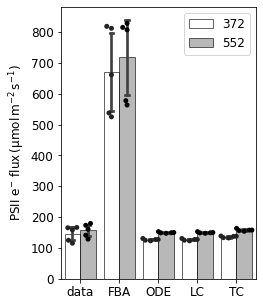

In [20]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3.5,5))
import seaborn as sns
g = sns.swarmplot(x="data/model", y="Flux", hue="CO2", data=PSII_df,dodge=True,color="black")

grayscale = ["#ffffff","#8a8a8a"]
newColMapping = {372:grayscale[0],552:grayscale[1]}
g = sns.barplot(x="data/model", y="Flux", hue="CO2", data=PSII_df, capsize=.1, ci="sd",alpha=0.6,edgecolor="black",palette=newColMapping)
h,l = g.get_legend_handles_labels()
plt.legend(h[2:],l[2:])
plt.ylabel(r'$\mathrm{PSII\/\/e^{-}\/\/flux\/(\mu mol\/m^{-2}\/s^{-1})}$')
plt.xlabel('')
plt.show()

In [21]:
# import pandas as pd
# starch_df = pd.DataFrame(data={
#                           "day":[191,191,205,205,215,215]+
#                                 [d for d in Day_list]+
#                                 [d for d in Day_list]+
#                                 [d for d in Day_list]+
#                                 [d for d in Day_list]+
#                                 [d for d in Day_list]+
#                                 [d for d in Day_list]+
#                                 [d for d in Day_list]+
#                                 [d for d in Day_list],
#                           "CO2":[372,552,372,552,372,552]+
#                                 [372 for d in Day_list]+[552 for d in Day_list]+
#                                 [372 for d in Day_list]+[552 for d in Day_list]+
#                                 [372 for d in Day_list]+[552 for d in Day_list]+
#                                 [372 for d in Day_list]+[552 for d in Day_list],
#                           "Flux":[20.1,30.8,10.2,19.8,11,11.9]+
#                                  [FBA_starch_content[d][372] for d in Day_list]+
#                                  [FBA_starch_content[d][552] for d in Day_list]+
#                                  [ODE_starch_content[d][372] for d in Day_list]+
#                                  [ODE_starch_content[d][552] for d in Day_list]+
#                                  [LC_starch_content[d][372] for d in Day_list]+
#                                  [LC_starch_content[d][552] for d in Day_list]+
#                                  [TC_starch_content[d][372] for d in Day_list]+
#                                  [TC_starch_content[d][552] for d in Day_list],
#                           "data/model":["Data","Data","Data","Data","Data","Data"]+
#                                        ["FBA" for d in Day_list]+
#                                        ["FBA" for d in Day_list]+
#                                        ["ODE" for d in Day_list]+
#                                        ["ODE" for d in Day_list]+
#                                        ["LC" for d in Day_list]+
#                                        ["LC" for d in Day_list]+
#                                        ["TC" for d in Day_list]+
#                                        ["TC" for d in Day_list]})

In [98]:
import pandas as pd
starch_df = pd.DataFrame(data={
                          "day":[191,191,205,205,215,215]+
                                [191,205,215]+
                                [191,205,215]+
                                [191,205,215]+
                                [191,205,215]+
                                [191,205,215]+
                                [191,205,215]+
                                [191,205,215]+
                                [191,205,215],
                          "CO2":[372,552,372,552,372,552]+
                                [372 for d in Day_list if d in [191,205,215]]+[552 for d in Day_list if d in [191,205,215]]+
                                [372 for d in Day_list if d in [191,205,215]]+[552 for d in Day_list if d in [191,205,215]]+
                                [372 for d in Day_list if d in [191,205,215]]+[552 for d in Day_list if d in [191,205,215]]+
                                [372 for d in Day_list if d in [191,205,215]]+[552 for d in Day_list if d in [191,205,215]],
                          "Flux":[21.1,32.2,9.2,17.2,11,11.9]+
                                 [FBA_starch_content[d][372] for d in Day_list if d in [191,205,215]]+
                                 [FBA_starch_content[d][552] for d in Day_list if d in [191,205,215]]+
                                 [ODE_starch_content[d][372] for d in Day_list if d in [191,205,215]]+
                                 [ODE_starch_content[d][552] for d in Day_list if d in [191,205,215]]+
                                 [LC_starch_content[d][372] for d in Day_list if d in [191,205,215]]+
                                 [LC_starch_content[d][552] for d in Day_list if d in [191,205,215]]+
                                 [TC_starch_content[d][372] for d in Day_list if d in [191,205,215]]+
                                 [TC_starch_content[d][552] for d in Day_list if d in [191,205,215]],
                          "data/model":["Data","Data","Data","Data","Data","Data"]+
                                       ["FBA" for d in Day_list if d in [191,205,215]]+
                                       ["FBA" for d in Day_list if d in [191,205,215]]+
                                       ["ODE" for d in Day_list if d in [191,205,215]]+
                                       ["ODE" for d in Day_list if d in [191,205,215]]+
                                       ["LC" for d in Day_list if d in [191,205,215]]+
                                       ["LC" for d in Day_list if d in [191,205,215]]+
                                       ["TC" for d in Day_list if d in [191,205,215]]+
                                       ["TC" for d in Day_list if d in [191,205,215]]})

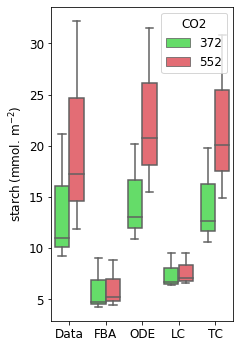

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3.5,5))
redblue = ["#51f057","#f75964"]
redblueMapping = {372:redblue[0],552:redblue[1]}
sns.boxplot(x="data/model", y="Flux", hue="CO2", data=starch_df, palette=redblueMapping)


from scipy.stats import ttest_ind
temp = starch_df[starch_df["CO2"]==372]
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="FBA"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(0.8,10,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="ODE"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(1.8,25,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="LC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(2.8,12,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="TC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(3.8,25,s=30,marker="*",color="black")


temp = starch_df[starch_df["CO2"]==552]
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="FBA"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(1.2,10,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="ODE"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(2.2,35,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="LC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(3.2,12,s=30,marker="*",color="black")
ans_fba = ttest_ind(temp[temp["data/model"]=="Data"]["Flux"],temp[temp["data/model"]=="TC"]["Flux"])
if ans_fba.pvalue < 0.001:
    plt.scatter(4.2,35,s=30,marker="*",color="black")



plt.ylabel(r'$\mathrm{starch\/(mmol.\/m^{-2})}$')
plt.xlabel('')
plt.tight_layout()
plt.savefig("Fig4c_box.svg",format="svg")

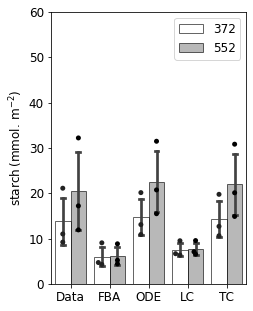

In [24]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(3.5,5))
import seaborn as sns
g = sns.swarmplot(x="data/model", y="Flux", hue="CO2", data=starch_df,dodge=True,color="black")
grayscale = ["#ffffff","#8a8a8a"]
newColMapping = {372:grayscale[0],552:grayscale[1]}
g = sns.barplot(x="data/model", y="Flux", hue="CO2", data=starch_df, capsize=.1, ci="sd",alpha=0.6,edgecolor="black",palette=newColMapping)
h,l = g.get_legend_handles_labels()
plt.legend(h[2:],l[2:])
plt.ylabel(r'$\mathrm{starch\/(mmol.\/m^{-2})}$')
plt.xlabel('')
plt.ylim(0,60)
plt.show()

In [100]:
Rd_dict_372=list()
Rd_dict_552=list()
for d in [164,176,191,205,215]:
    for CO2 in [372,552]:
        fin = open("./Nighttime_flux_FACE"+str(d)+"_"+str(CO2)+".csv")
        tempFluxDict=dict()
        for line in fin:
            line=line.replace("\n","")
            tempFluxDict[line.split(",")[0]]=float(line.split(",")[2])
        print(tempFluxDict["CO2_tx"])
        if CO2==372:
            Rd_dict_372.append(-1*tempFluxDict["CO2_tx"])
        if CO2==552:
            Rd_dict_552.append(-1*tempFluxDict["CO2_tx"])
        print("Day="+str(d)+" - CO2="+str(CO2)+" - Rd="+str(-1*tempFluxDict["CO2_tx"]))

import pandas as pd
Rd_df = pd.DataFrame(data={
                          "day":["Day164","Day176","Day191","Day205","Day215"]*2,
                          "CO2":[372,372,372,372,372]+[552,552,552,552,552],
                          "Flux":Rd_dict_372+Rd_dict_552})

-2.913307983588026
Day=164 - CO2=372 - Rd=2.913307983588026
-3.1217151688566442
Day=164 - CO2=552 - Rd=3.1217151688566442
-2.5310215469790243
Day=176 - CO2=372 - Rd=2.5310215469790243
-2.714079912783657
Day=176 - CO2=552 - Rd=2.714079912783657
-2.88970873581598
Day=191 - CO2=372 - Rd=2.88970873581598
-3.09602872601029
Day=191 - CO2=552 - Rd=3.09602872601029
-2.074262825600027
Day=205 - CO2=372 - Rd=2.074262825600027
-2.226284959620684
Day=205 - CO2=552 - Rd=2.226284959620684
-1.9119795474457884
Day=215 - CO2=372 - Rd=1.9119795474457884
-1.9920387972790101
Day=215 - CO2=552 - Rd=1.9920387972790101


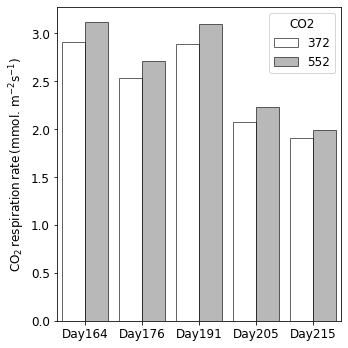

In [101]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5,5))
import seaborn as sns
#g = sns.swarmplot(x="data/model", y="Flux", hue="CO2", data=starch_df2,dodge=True,color="black")
grayscale = ["#ffffff","#8a8a8a"]
newColMapping = {372:grayscale[0],552:grayscale[1]}
g = sns.barplot(x="day", y="Flux", hue="CO2", data=Rd_df, capsize=.1, ci="sd",alpha=0.6,edgecolor="black",palette=newColMapping)
h,l = g.get_legend_handles_labels()
plt.ylabel(r'$\mathrm{CO_{2}\/respiration\/rate\/(mmol.\/m^{-2}s^{-1})}$')
plt.xlabel('')
plt.tight_layout()
plt.savefig("Figure6.svg",format="svg")